# Coddington's equations for grazing angle mirrors
awojdyla@lbl.gov - November 2018

We implement the Coddington's equations to compute the radius of curvature for a mirror.

– based on `20181118 Toroid tolerance (analytical astigmatism).ipynb`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Focusing optics parameters

In [2]:
# object distance
#p_m = 31.4
p_m = 15
# image distance
q_m = 4.2
# grazing angle
theta_rad = 1.5*np.pi/180

In [3]:
# focal length
f_m = 1/(1/p_m + 1/q_m)
# tangential radius of curvature
R_m = 1/((1/p_m+1/q_m)*np.sin(theta_rad)/2)
# sagittal radius of curvature
rho_m = 1/((1/p_m+1/q_m)/(np.sin(theta_rad)*2))
print("tangential radius of curvature: %1.1f m" %(R_m))
print("sagittal radius of curvature:   %1.1f mm" %(rho_m*1e3))

tangential radius of curvature: 250.7 m
sagittal radius of curvature:   171.8 mm


## depth of focus

In [4]:
# ALS-U/COSMIC photon beam parameters at 260eV
lambda_m = 5e-9
x_m = 25e-6
xp_rad = 35e-6

In [5]:
# depth of focus

# magnification
mag = p_m/q_m
# depth of focus
zd_m = lambda_m/(2*xp_rad*mag)**2

print(" Wavelength:      {:.1f} nm".format(lambda_m*1e9,format_spec="3.1f"))
print(" depth of focus: {:.1f} mm".format(zd_m*1e3,format_spec="3.1f"))

 Wavelength:      5.0 nm
 depth of focus: 80.0 mm


In [6]:
# Rayleigh distance
zr_m = np.pi*(x_m/mag)**2/lambda_m
print(" Wavelength:         {:.1f} nm".format(lambda_m*1e9,format_spec="3.1f"))
print(" Rayleigh distance: {:.1f} mm".format(zr_m*1e3,format_spec="3.1f"))

 Wavelength:         5.0 nm
 Rayleigh distance: 30.8 mm


## Study of astigmatism for toroidal mirrors

In [7]:
qt  = lambda theta: 1/(2/(R_m*np.sin(theta))-1/p_m)
qs  = lambda theta: 1/(2*np.sin(theta)/(rho_m)-1/p_m)

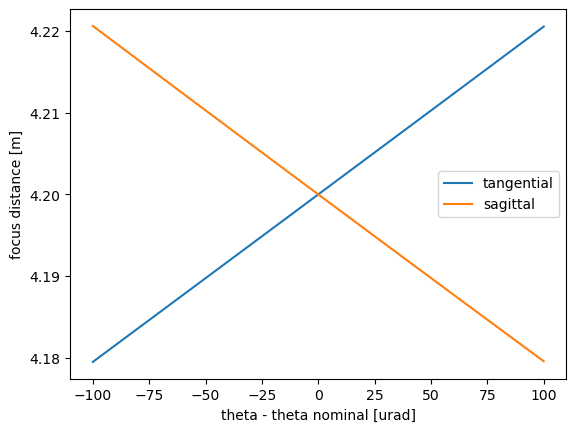

In [8]:
theta = theta_rad + np.linspace(-1,1,201)*0.1e-3

plt.plot((theta-theta_rad)*1e6, qt(theta),(theta-theta_rad)*1e6, qs(theta))
plt.xlabel('theta - theta nominal [urad]')
plt.ylabel('focus distance [m]')
plt.legend(['tangential','sagittal'])
plt.show()

## tolerance to detuning

In [9]:
p_m = 20
# image distance
q_m = 5
# grazing angle
theta_rad = (1.25)*np.pi/180


# tangential radius of curvature
R_m = 1/((1/p_m+1/q_m)*np.sin(theta_rad)/2)
# sagittal radius of curvature
rho_m = 1/((1/p_m+1/q_m)/(np.sin(theta_rad)*2))

# detune angle [
detune_angle_rad = (0.01)*np.pi/180

#new tangential object distance [m]
qt_m=-1/(1/p_m-2/(R_m*np.sin(theta_rad+detune_angle_rad)))
# new sagittal object distance [m]
qs_m=-1/(1/p_m-2*np.sin((theta_rad+detune_angle_rad))/(rho_m))

# distance betweeen nominal and detuned focus
dqt_m = qt_m - q_m
dqs_m = qs_m - q_m
print("detune angle: {:.1f} mrad".format(detune_angle_rad*1e3,format_spec="3.1f"))  
print("tangential detune: {:.1f} mm".format(dqt_m*1e3,format_spec="3.1f"))
print("sagittal detune:   {:.1f} mm".format(dqs_m*1e3,format_spec="3.1f"))

detune angle: 0.2 mrad
tangential detune: 50.1 mm
sagittal detune:   -49.5 mm


In [10]:
deflection_m = 2*np.sin(detune_angle_rad)
print('additional deflection: %1.3fmm' % (deflection_m*1e3))

additional deflection: 0.349mm


## Effective source distance for a flat mirror with spherical deformation

In [11]:
# source distance (or secondary source distance)
p_m = 20
# grazing angle
theta0_rad = (1.25)*np.pi/180

R_m = -10000 # may depend on theta0_rad 
qr_m = 1/(2/(R_m*np.sin(theta0_rad))-1/p_m)

## new "virtual" source distance for a focusing mirror upstream
pr_m = -qr_m
print("virtual source distance: %1.1f m" %(pr_m))
# compare the differential source position with undulator length (2m) if the source is the undulator.

virtual source distance: 16.9 m
